<function matplotlib.pyplot.show(close=None, block=None)>

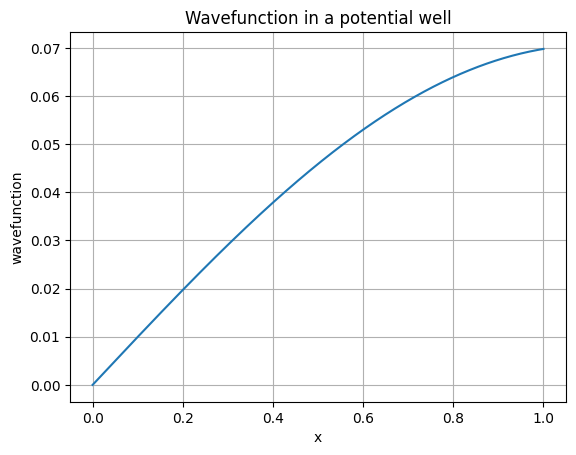

In [16]:
# -*- coding: utf-8 -*-
"""
Created on Mon Nov  4 09:15:40 2024

@author: Conor Kirby
"""

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import simpson

"step 1: defining all the variables"
N=1000
psi=np.zeros(N)

l = 1/(N-1)
x = np.linspace(0, 1, N)
nlist = np.arange(0, N, 1)

e = -0.99

gamma2 = 200
"nrg = (1*np.pi)**2/gamma2 -1"

#inside well V(x) = -V_0 ie, nu = -1 for 0<x<L
potential = np.full(N, -1) #create an array of length N filled with -1




# for n in nlist:
#     k2=[]
#     nrg = (n*np.pi)**2/gamma2 -1
#     k2.append(gamma2*(nrg - potential))
# Not as efficient since we can use k2 in the function to calculate all the k2 values at once


def wave(x):
    psi=np.zeros(N)
    psi[0] = 0
    psi[1] = 1e-4

    k2 = gamma2*(x - potential)

    
    for i in range(1, N-1):
            psi[i+1] = (2*(1-(5/12)*l**2*k2[i])*psi[i]-(1+(1/12)*l**2*k2[i-1])*psi[i-1])/(1+(1/12)*l**2*k2[i+1])

    return psi

psi = wave(e)

plt.plot(x, psi)
plt.grid()
plt.xlabel("x")
plt.ylabel("wavefunction")
plt.title("Wavefunction in a potential well")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

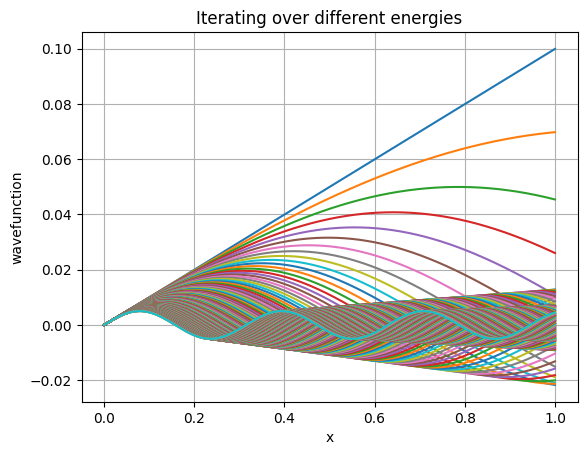

In [17]:
#plotting the wavefunction for different energies
elist = np.arange(-1, 1, 0.01)

for e in elist:
    psi = wave(e)
    plt.plot(x, psi)
plt.grid()
plt.xlabel("x")
plt.ylabel("wavefunction")
plt.title("Iterating over different energies")
plt.show


-0.9506530761718752


<function matplotlib.pyplot.show(close=None, block=None)>

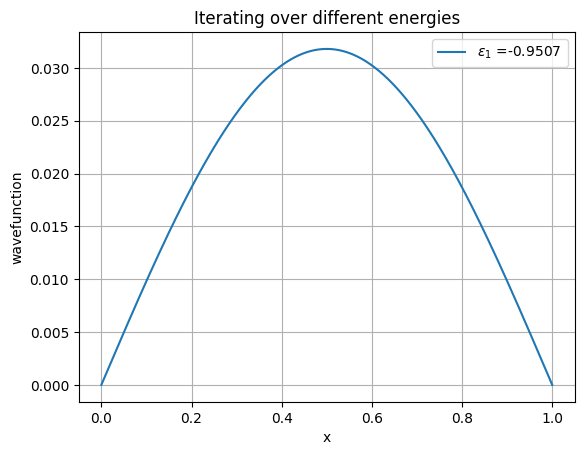

In [18]:
#changing delta e when the parity of the wavefunction changes

e = -0.99
de = 0.01
while abs(de) > 1e-6: #accuracy
    psi = wave(e)    
    psi2 = wave(e+de)
    if psi[N-1]*psi2[N-1] < 0: #if it changes sign then the product of the two values will be negative
        e = e + de
        de = -de/2
    else:
        e += de
print(e)
plt.plot(x,psi,label=rf'$\epsilon_1$ ={e:.4f} ')
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("wavefunction")
plt.title("Iterating over different energies")
plt.show

#currently only doing the first energy level, need to do all of them

WOW WE FOUND AN EIGENVALUE!! - e1 = -0.95065308
WOW WE FOUND AN EIGENVALUE!! - e2 = -0.80260864
WOW WE FOUND AN EIGENVALUE!! - e3 = -0.55586792
WOW WE FOUND AN EIGENVALUE!! - e4 = -0.21043213
WOW WE FOUND AN EIGENVALUE!! - e5 = 0.23369995
WOW WE FOUND AN EIGENVALUE!! - e6 = 0.77652832
WOW WE FOUND AN EIGENVALUE!! - e7 = 1.41805298
WOW WE FOUND AN EIGENVALUE!! - e8 = 2.15827271
WOW WE FOUND AN EIGENVALUE!! - e9 = 2.99718872
WOW WE FOUND AN EIGENVALUE!! - e10 = 3.93480103
[-0.9506530761718752, -0.8026086425781254, -0.5558679199218753, -0.2104321289062501, 0.23369995117187495, 0.7765283203125002, 1.4180529785156262, 2.1582727050781227, 2.9971887207031047, 3.9348010253905845]


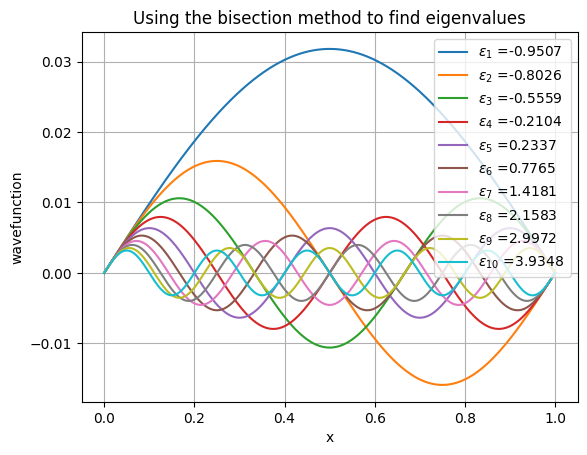

In [19]:
e = -0.99
eindex = 1
evals = []
while e < 3: # keep running until we have found ten eigenvalues
    de = 0.01
    e += de
    while abs(de) > 1e-6: #accuracy
        psi = wave(e)    
        psi2 = wave(e+de)
        if psi[N-1]*psi2[N-1] < 0: #if it changes sign then the product of the two values will be negative
            e = e + de
            de = -de/2
        else:
            e += de
    print(f"WOW WE FOUND AN EIGENVALUE!! - e{eindex} = {e:.8f}" )
    evals.append(e)
    plt.plot(x,psi,label=rf'$\epsilon_{{{eindex}}}$ ={e:.4f} ')
    eindex += 1
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("wavefunction")
plt.title("Using the bisection method to find eigenvalues")
plt.show

print(evals)

WOW WE FOUND AN EIGENVALUE!! - e1 = -0.95065199
WOW WE FOUND AN EIGENVALUE!! - e2 = -0.80260792
WOW WE FOUND AN EIGENVALUE!! - e3 = -0.55586781
WOW WE FOUND AN EIGENVALUE!! - e4 = -0.21043165
WOW WE FOUND AN EIGENVALUE!! - e5 = 0.23370054
WOW WE FOUND AN EIGENVALUE!! - e6 = 0.77652878
WOW WE FOUND AN EIGENVALUE!! - e7 = 1.41805307
WOW WE FOUND AN EIGENVALUE!! - e8 = 2.15827339
WOW WE FOUND AN EIGENVALUE!! - e9 = 2.99718977
WOW WE FOUND AN EIGENVALUE!! - e10 = 3.93480217
eigenvals:  [-0.9506519889831543, -0.8026079177856444, -0.5558678054809567, -0.21043165206909117, 0.2337005424499519, 0.776528778076173, 1.4180530738830581, 2.1582733917236316, 2.997189769744854, 3.934802169799766]
analytic E [-0.9506519779945533, -0.8026079119782128, -0.5558678019509788, -0.2104316479128514, 0.23370055013616975, 0.7765287921960846, 1.4180530782668925, 2.1582734083485944, 2.99718978244119, 3.934802200544679]
accuracys: [-1.0988601029104927e-08, -5.807431646687178e-09, -3.529977865568412e-09, -4.15623976

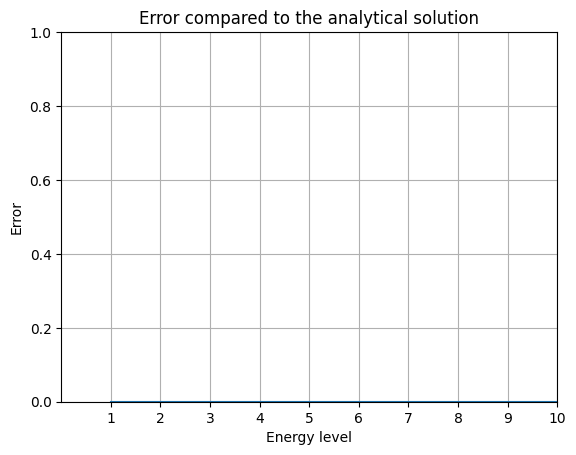

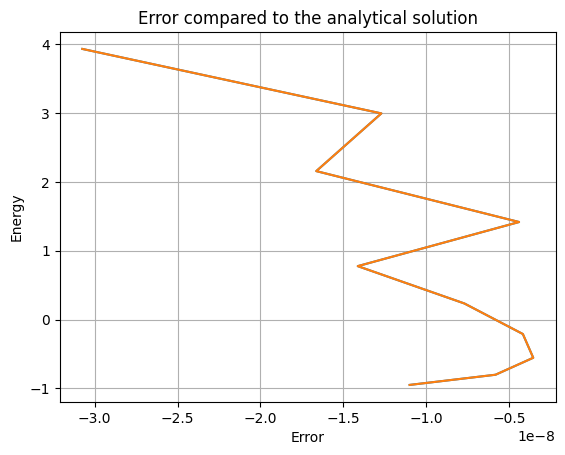

In [20]:
#Accuracy compared to the analytical solution

#accuracy = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]


e = -0.99
eindex = 1
evals = []

while e < 3: 
    de = 0.01
    e += de
    while abs(de) > 1e-8: #change this accuracy to see how the error changes
        psi = wave(e)    
        psi2 = wave(e+de)
        if psi[N-1]*psi2[N-1] < 0: 
            e = e + de
            de = -de/2
        else:
            e += de
    print(f"WOW WE FOUND AN EIGENVALUE!! - e{eindex} = {e:.8f}" )
    evals.append(e)
    eindex += 1

    
print("eigenvals: ", evals)
ea = []
for n in range(1, len(evals)+1):
    ea.append((n*np.pi)**2/gamma2 -1)
print("analytic E", ea)

acc=[]
for i in range(len(evals)): 
    acc.append(evals[i] - ea[i])
print("accuracys:", acc)

plt.plot(range(1, len(ea)+1), acc)
plt.grid()
plt.ylabel("Error")
plt.xlabel("Energy level")
plt.xticks(range(1, len(ea) + 1))
plt.title("Error compared to the analytical solution")
# Set x-axis and y-axis limits to start from 0
plt.xlim(0, len(ea))
plt.ylim(0, max(acc) if max(acc) > 0 else 1)  # Ensure y-axis starts from 0

plt.show()


plt.plot(acc, evals)
plt.plot(acc, ea)
plt.grid()
plt.xlabel("Error")
plt.ylabel("Energy")
plt.title("Error compared to the analytical solution")
plt.show()


1.0000000000000002
0.9999999999999998
1.0
1.0000000000000002
1.0000000000000004
0.9999999999999998
1.0
1.0
1.0
1.0000000000000002


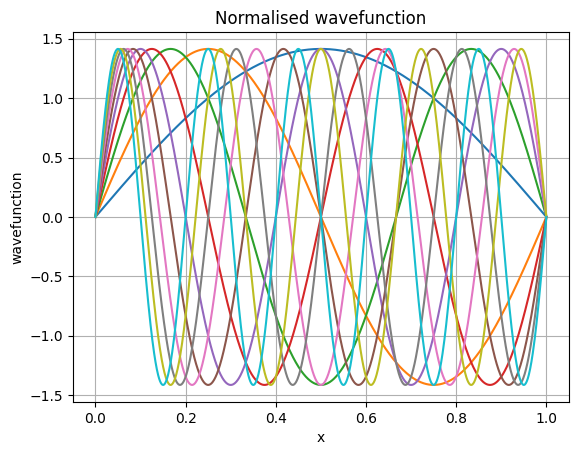

Eigenvalues: [-0.9506530761718752, -0.8026086425781254, -0.5558679199218753, -0.2104321289062501, 0.23369995117187495, 0.7765283203125002, 1.4180529785156262, 2.1582727050781227, 2.9971887207031047, 3.9348010253905845]


In [21]:
#normalising the wavefunction

e = -0.99
eindex = 1
evals = []
l = 1/(N-1)

while e < 3: 
    de = 0.01
    e += de
    while abs(de) > 1e-6: 
        psi = wave(e)    
        psi2 = wave(e+de)
        if psi[N-1]*psi2[N-1] < 0: 
            e = e + de
            de = -de/2
        else:
            e += de
    #print(f"WOW WE FOUND AN EIGENVALUE!! - e{eindex} = {e:.8f}" )
    evals.append(e)
    eindex += 1

for e in evals:
    psi = wave(e)
    norm = simpson(psi**2, dx=l) #normalising the wavefunction
    psi_norm = psi/np.sqrt(norm) #normalised wavefunction
    plt.plot(x, psi_norm)
    print(simpson(psi_norm**2, dx=l)) #check if the wavefunction is normalised
plt.grid()
plt.xlabel("x")
plt.ylabel("wavefunction")
plt.title("Normalised wavefunction")
plt.show()

print("Eigenvalues:", evals)
"""Analytical solution of the normalisation constant = sqrt(2)"""
for n in range(1, 3):
    def normalisation(xt):
        return np.sqrt(2)*np.sin(n*np.pi*x)
   


1.0000000000000002
0.9999999999999998
1.0
1.0000000000000002


<>:22: SyntaxWarning: invalid escape sequence '\P'
<>:23: SyntaxWarning: invalid escape sequence '\P'
<>:22: SyntaxWarning: invalid escape sequence '\P'
<>:23: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Conor Kirby\AppData\Local\Temp\ipykernel_15900\1500363393.py:22: SyntaxWarning: invalid escape sequence '\P'
  blue_line = Line2D([0], [0], color='blue', label='Numerical $\Psi_n$')
C:\Users\Conor Kirby\AppData\Local\Temp\ipykernel_15900\1500363393.py:23: SyntaxWarning: invalid escape sequence '\P'
  red_line = Line2D([0], [0], color='red', linestyle='--', label='Analytical $\Psi_a$')


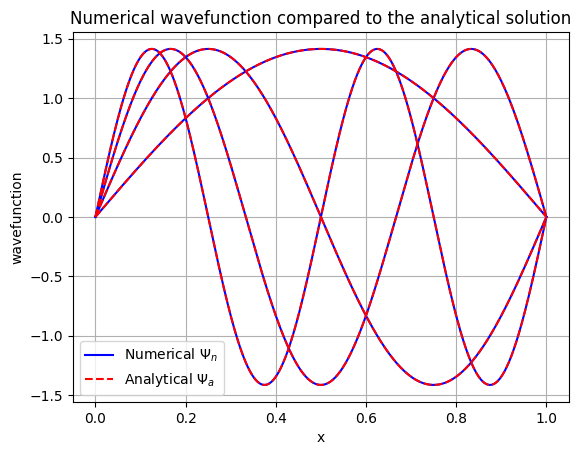

In [22]:
from IPython.display import display, Math, Latex

#comparing the normalised wavefunction to the analytical solution

for e in evals[0:4]:
    psi = wave(e)
    norm = simpson(psi**2, dx=l) #normalising the wavefunction
    psi_norm = psi/np.sqrt(norm) #normalised wavefunction
    plt.plot(x, psi_norm, color='blue')
    print(simpson(psi_norm**2, dx=l)) #check if the wavefunction is normalised

#plt.show()

for n in range(1, 5):
    def anal(x):
        return np.sqrt(2)*np.sin(n*np.pi*x)
    
    plt.plot(x, anal(x), color='red', linestyle='--')

# Create proxy artists for the legend
from matplotlib.lines import Line2D
blue_line = Line2D([0], [0], color='blue', label='Numerical $\Psi_n$')
red_line = Line2D([0], [0], color='red', linestyle='--', label='Analytical $\Psi_a$')

plt.grid()
plt.xlabel("x")
plt.ylabel("wavefunction")
plt.title("Numerical wavefunction compared to the analytical solution")
plt.legend(handles=[blue_line, red_line])
plt.show()

<x> 0.5000055635360983
<x2> 0.2826790321927779
unc_x = 0.18075804
<x> 0.5000009253379206
<x2> 0.3206693723043433
unc_x = 0.26583538
<x> 0.5000000664441003
<x2> 0.3277044658251587
unc_x = 0.27875509
<x> 0.5000001523579426
<x2> 0.33016724763363503
unc_x = 0.28313794
<x> 0.5000001214560869
<x2> 0.3313070707337602
unc_x = 0.28514373


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

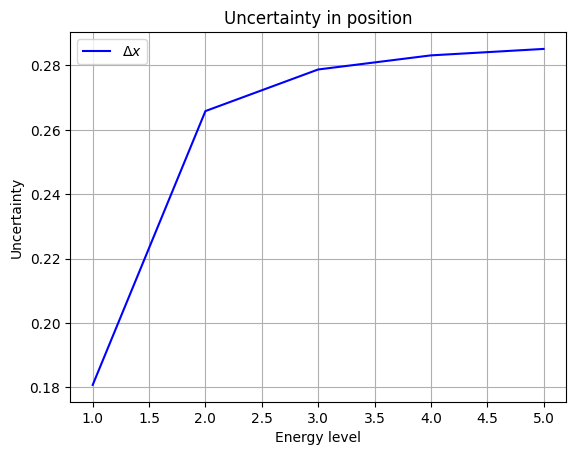

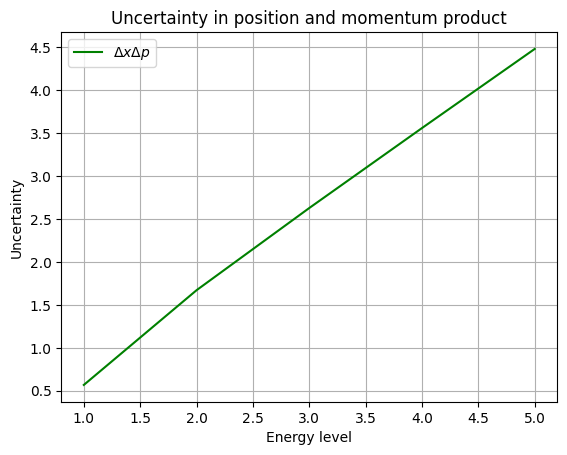

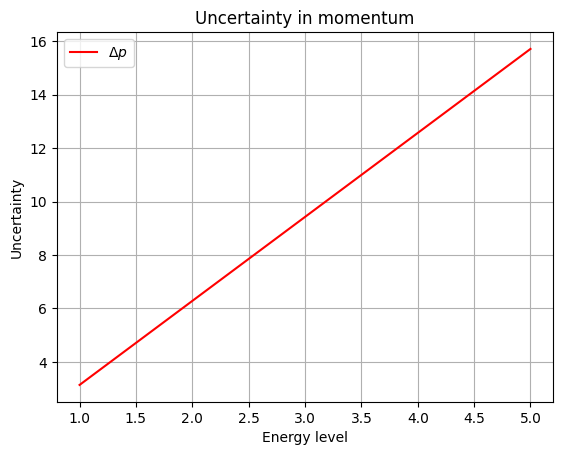

In [23]:
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex 
#Computing the uncertainty relation \Delta x \Delta p = \hbar/2
#Calculating the expectation value of x and p
uncsx = []
for e in evals[0:5]:
    psi = wave(e)
    norm = simpson(psi**2, dx=l) #normalising the wavefunction
    psi_norm = psi/np.sqrt(norm) #normalised wavefunction

    #Expectation value of x = \int x |\Psi|^2 dx
    mean_x = simpson(x*psi_norm**2, dx=l)
    print("<x>", mean_x)

    mean_x2 = simpson(x**2*psi_norm**2, dx=l)
    print("<x2>", mean_x2)

    unc_x =  np.sqrt(mean_x2 - mean_x**2)
    print(r"unc_x = {:.8f}".format(unc_x))

    uncsx.append(unc_x)

#Expectation value of p = \int p |\Psi|^2 dx
def psiprimeprime(x, e):
    psi = wave(e)
    norm = simpson(psi**2, dx=l) 
    psi_norm = psi/np.sqrt(norm)
    return -gamma2*(e - potential)*psi_norm

uncsp = []
for e in evals[0:5]:
    psi = wave(e)
    norm = simpson(psi**2, dx=l) 
    psi_norm = psi/np.sqrt(norm)

    unc_p = np.sqrt(-simpson(psiprimeprime(x, e)*psi_norm, dx=l))
    display(Math(r"\Delta p = {:.8f}".format(unc_p)))


    uncsp.append(unc_p)
    
#Computing the uncertainty relation \Delta x \Delta p = \hbar/2
hbar = 1
uncertainty = []

for i in range(5):
    uncertainty.append(uncsx[i]*uncsp[i])
    display(Math(r"\Delta x \Delta p = {:.8f}".format(uncsx[i]*uncsp[i])))

# Plotting the uncertainty in x and p with respect to the energy levels
plt.plot(range(1, 6), uncsx, label=r"$\Delta x$", color='blue')
plt.grid()
plt.xlabel("Energy level")
plt.ylabel("Uncertainty")
plt.title("Uncertainty in position")
plt.legend()
plt.show()

plt.plot(range(1, 6), uncertainty, label=r"$\Delta x \Delta p$", color='green')
plt.grid()
plt.xlabel("Energy level")
plt.ylabel("Uncertainty")
plt.title("Uncertainty in position and momentum product")
plt.legend()
plt.show()

plt.plot(range(1, 6), uncsp, label=r"$\Delta p$", color='red')
plt.grid()
plt.xlabel("Energy level")
plt.ylabel("Uncertainty")
plt.title("Uncertainty in momentum")
plt.legend()
plt.show()

#In report the relation is more obvious when more energy levels are plotted

Uncertainty in x: ['0.18076', '0.26584', '0.27876', '0.28314', '0.28514']
Uncertainty in p: ['3.1416', '6.2832', '9.4248', '12.566', '15.708']
Uncertainty relation: ['0.56786', '1.6703', '2.6272', '3.558', '4.479']
Real uncertainty in x: ['0.180756', '0.265835', '0.278755', '0.283138', '0.285144']
Real uncertainty in p: ['3.14159', '6.28319', '9.42478', '12.5664', '15.708']
Real uncertainty relation: ['0.567862', '1.67029', '2.6272', '3.55802', '4.47903']
Error in x: ['2.01127e-06', '4.91925e-07', '3.69291e-08', '8.60626e-08', '6.89062e-08']
Error in p: ['3.49563e-05', '1.16279e-05', '1.25174e-06', '3.82773e-06', '3.81345e-06']
Error in uncertainty relation: ['3.57018e-11', '2.46938e-10', '8.78726e-10', '2.28098e-09', '5.0046e-09']


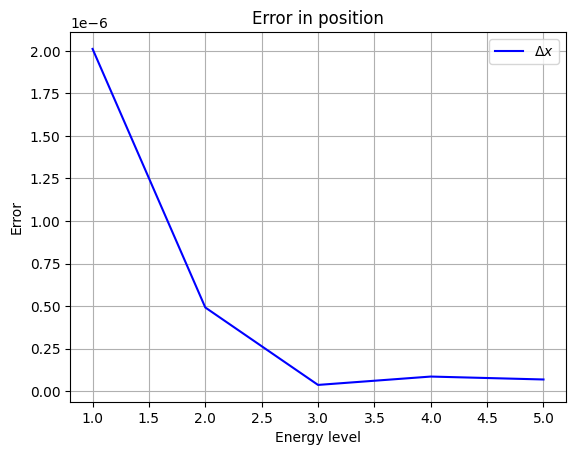

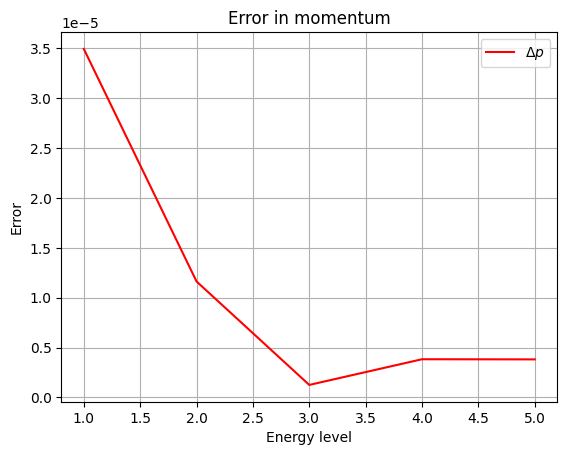

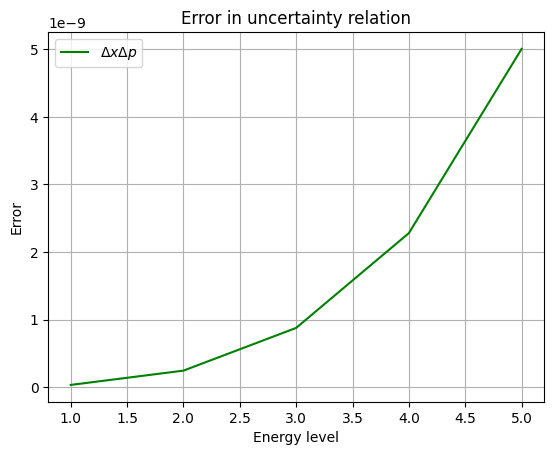

In [24]:
#Check values
print("Uncertainty in x:", [f"{val:.5g}" for val in uncsx])
print("Uncertainty in p:", [f"{val:.5g}" for val in uncsp])
print("Uncertainty relation:", [f"{val:.5g}" for val in uncertainty])

realuncx = []
realuncp = []
realuncertainty = []

for n in range(1, 6):
    def analpsi(x):
        return np.sqrt(2)*np.sin(n*np.pi*x)
    realuncx.append(np.sqrt(simpson(x**2*analpsi(x)**2, dx = l)- 1/4) )
    realuncp.append(np.sqrt(-simpson((-(n*np.pi)**2)*analpsi(x)**2, dx = l)))
    realuncertainty.append(realuncx[n-1]*realuncp[n-1])

print("Real uncertainty in x:", [f"{val:.6g}" for val in realuncx])
print("Real uncertainty in p:", [f"{val:.6g}" for val in realuncp])
print("Real uncertainty relation:", [f"{val:.6g}" for val in realuncertainty])

# Error between numerical and analytical values
errx = []
errp = []
errunc = []

for i in range(5):
    errx.append(abs(uncsx[i] - realuncx[i]))
    errp.append(abs(uncsp[i] - realuncp[i]))
    errunc.append(abs(uncertainty[i] - realuncertainty[i]))

print("Error in x:", [f"{val:.6g}" for val in errx])
print("Error in p:", [f"{val:.6g}" for val in errp])
print("Error in uncertainty relation:", [f"{val:.6g}" for val in errunc])

# Plotting the error in x and p with respect to the energy levels
plt.plot(range(1, 6), errx, label=r"$\Delta x$", color='blue')
plt.grid()
plt.xlabel("Energy level")
plt.ylabel("Error")
plt.title("Error in position")
plt.legend()
plt.show()

plt.plot(range(1, 6), errp, label=r"$\Delta p$", color='red')
plt.grid()
plt.xlabel("Energy level")
plt.ylabel("Error")
plt.title("Error in momentum")
plt.legend()
plt.show()

plt.plot(range(1, 6), errunc, label=r"$\Delta x \Delta p$", color='green')
plt.grid()
plt.xlabel("Energy level")
plt.ylabel("Error")
plt.title("Error in uncertainty relation")
plt.legend()
plt.show()


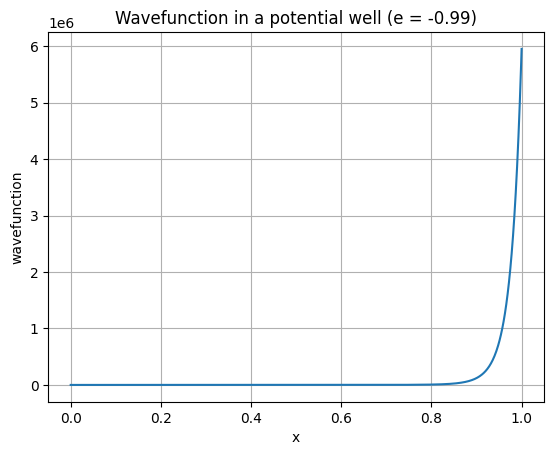

-0.9105572891235352


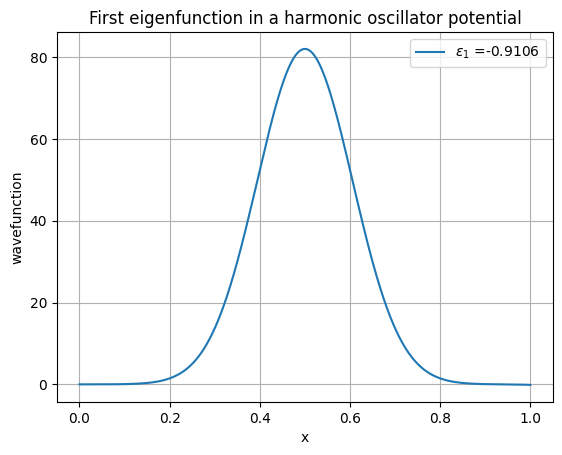

In [25]:
#Now we change the potential to a harmonic oscillator potential
def newpot(x):
    return 8*(x-0.5)**2 - 1

"step 1: defining all the variables"
N=1000
psi=np.zeros(N)

l = 1/(N-1)
x = np.linspace(0, 1, N)
nlist = np.arange(0, N, 1)

e = -0.99

gamma2 = 1000

def harm_wave(e, x):
    psi=np.zeros(N)
    psi[0] = 0
    psi[1] = 1e-4

    k2 = gamma2*(e - newpot(x))

    
    for i in range(1, N-1):
            psi[i+1] = (2*(1-(5/12)*l**2*k2[i])*psi[i]-(1+(1/12)*l**2*k2[i-1])*psi[i-1])/(1+(1/12)*l**2*k2[i+1])

    return psi

psi = harm_wave(e, x)

plt.plot(x, psi)
plt.grid()
plt.xlabel("x")
plt.ylabel("wavefunction")
plt.title("Wavefunction in a potential well (e = -0.99)")
plt.show()

"""Using the bisection method to find the eigenvalues"""
e = -0.99
de = 0.01
while abs(de) > 1e-8: #accuracy
    psi = harm_wave(e, x)    
    psi2 = harm_wave(e+de, x)
    if psi[N-1]*psi2[N-1] < 0: #if it changes sign then the product of the two values will be negative
        e = e + de
        de = -de/2
    else:
        e += de
print(e)
plt.plot(x,psi,label=rf'$\epsilon_1$ ={e:.4f} ')
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("wavefunction")
plt.title("First eigenfunction in a harmonic oscillator potential")
plt.show()

WOW WE FOUND AN EIGENVALUE!! - e1 = -0.91055729
WOW WE FOUND AN EIGENVALUE!! - e2 = -0.73167185
WOW WE FOUND AN EIGENVALUE!! - e3 = -0.55278625
WOW WE FOUND AN EIGENVALUE!! - e4 = -0.37389898
WOW WE FOUND AN EIGENVALUE!! - e5 = -0.19499763
WOW WE FOUND AN EIGENVALUE!! - e6 = -0.01600986
WOW WE FOUND AN EIGENVALUE!! - e7 = 0.16337725
WOW WE FOUND AN EIGENVALUE!! - e8 = 0.34416523
WOW WE FOUND AN EIGENVALUE!! - e9 = 0.52869154
WOW WE FOUND AN EIGENVALUE!! - e10 = 0.72087549
[-0.9105572891235352, -0.7316718482971191, -0.5527862548828123, -0.37389898300170865, -0.1949976348876948, -0.01600986480712837, 0.16337724685669, 0.344165229797364, 0.5286915397644051, 0.7208754920959481]


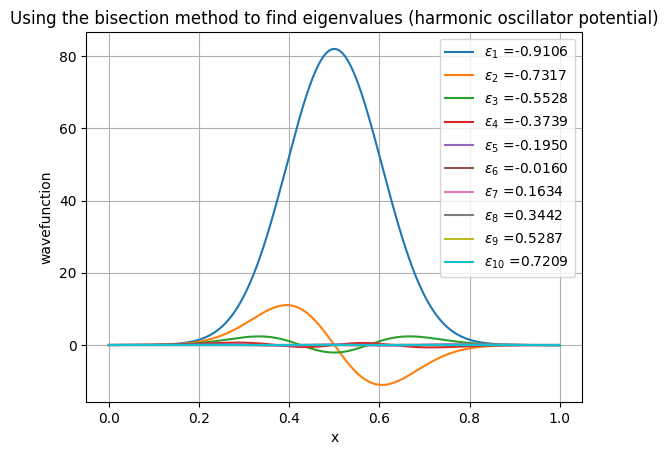

In [26]:
e = -0.99
eindex = 1
evalsh = []
while e < 0.7: # keep running until we have found ten eigenvalues
    de = 0.01
    e += de
    while abs(de) > 1e-8: #accuracy
        psi = harm_wave(e, x)    
        psi2 = harm_wave(e+de, x)
        if psi[N-1]*psi2[N-1] < 0: #if it changes sign then the product of the two values will be negative
            e = e + de
            de = -de/2
        else:
            e += de
    print(f"WOW WE FOUND AN EIGENVALUE!! - e{eindex} = {e:.8f}" )
    evalsh.append(e)
    plt.plot(x,psi,label=rf'$\epsilon_{{{eindex}}}$ ={e:.4f} ')
    eindex += 1
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("wavefunction")
plt.title("Using the bisection method to find eigenvalues (harmonic oscillator potential)")
plt.show
print(evalsh)

0.9999999999999998
0.9999999999999998
0.9999999999999998
1.0000000000000002
0.9999999999999996
1.0000000000000002
1.0
0.9999999999999998
1.0
1.0


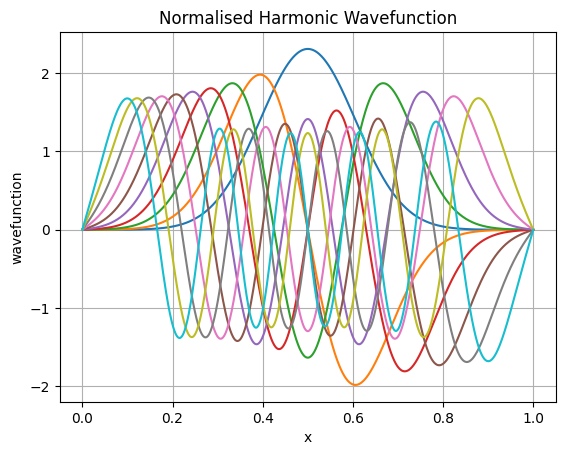

Eigenvalues: [-0.9105572891235352, -0.7316718482971191, -0.5527862548828123, -0.37389898300170865, -0.1949976348876948, -0.01600986480712837, 0.16337724685669, 0.344165229797364, 0.5286915397644051, 0.7208754920959481]


In [27]:
#NORMALISATION
def hwavenorm(e, x):
    psi = harm_wave(e, x)
    norm = simpson(psi**2, dx=l) #normalising the wavefunction
    return psi/np.sqrt(norm) #normalised wavefunction

eindex = 1
for e in evalsh[0:10]:
    plt.plot(x, hwavenorm(e, x), label=rf'$\epsilon_{{{eindex}}}$ ={e:.4f} ')
    print(simpson(hwavenorm(e, x)**2, dx=l)) #check if the wavefunction is normalised
    eindex += 1
plt.grid()
plt.xlabel("x")
plt.ylabel("wavefunction")
plt.title("Normalised Harmonic Wavefunction")
'''plt.legend()'''
plt.show()

print("Eigenvalues:", evalsh)


<x> 0.9877241739734608
<x2> 0.9757599785905658


<IPython.core.display.Math object>

<x> 0.9870595447352768
<x2> 0.9744686192580583


<IPython.core.display.Math object>

<x> 0.9643394783879045
<x2> 0.9411402276021881


<IPython.core.display.Math object>

<x> 0.92304373013376
<x2> 0.882297728309073


<IPython.core.display.Math object>

<x> 0.8292584436646894
<x2> 0.7616944514727405


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

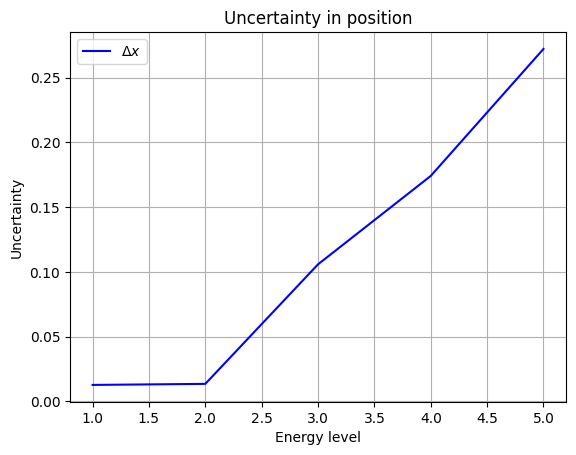

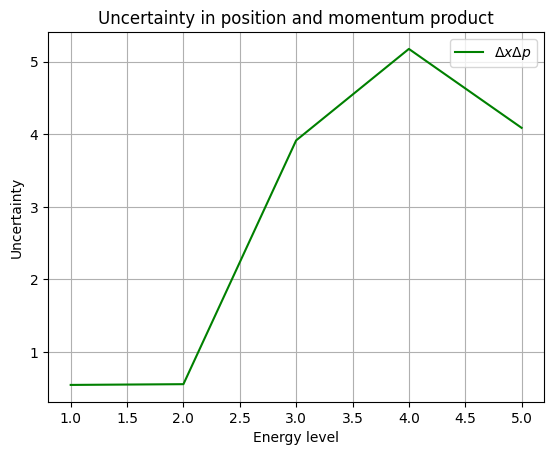

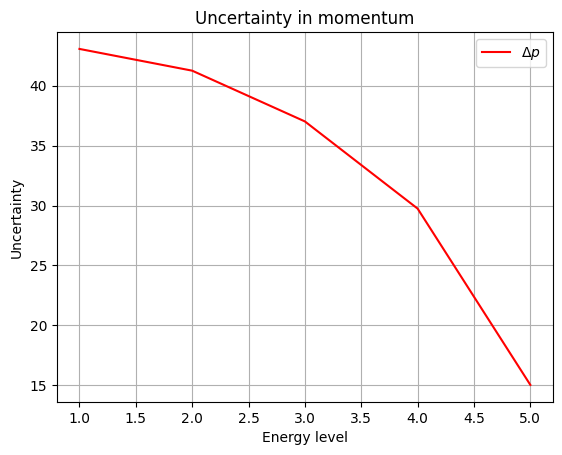

In [28]:
#Uncertainty relation
#Computing the uncertainty relation \Delta x \Delta p = \hbar/2

import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex 

#Calculating the expectation value of x and p
uncsx_h = []
for e in evals[0:5]:

    #Expectation value of x = \int x |\Psi|^2 dx
    mean_x = simpson(x*hwavenorm(e, x)**2, dx=l)
    print("<x>", mean_x)

    mean_x2 = simpson(x**2*hwavenorm(e, x)**2, dx=l)
    print("<x2>", mean_x2)

    unc_x =  np.sqrt(mean_x2 - mean_x**2)
    display(Math(r"\Delta x = {:.4f}".format(unc_x)))

    uncsx_h.append(unc_x)

#Expectation value of p = \int p |\Psi|^2 dx
def psiprimeprime(x, e):
    return gamma2*(e - newpot(x))*hwavenorm(e, x)

uncsp_h = []
for e in evals[0:5]:

    unc_p = np.sqrt(simpson(-psiprimeprime(x, e)*hwavenorm(e, x), dx=l))
    display(Math(r"\Delta p = {:.8f}".format(unc_p)))

    uncsp_h.append(unc_p)
    
#Computing the uncertainty relation \Delta x \Delta p = \hbar/2
hbar = 1
uncertainty_h = []

for i in range(5):
    uncertainty_h.append(uncsx_h[i]*uncsp_h[i])
    display(Math(r"\Delta x \Delta p = {:.8f}".format(uncsx_h[i]*uncsp_h[i])))

# Plotting the uncertainty in x and p with respect to the energy levels
plt.plot(range(1, 6), uncsx_h, label=r"$\Delta x$", color='blue')
plt.grid()
plt.xlabel("Energy level")
plt.ylabel("Uncertainty")
plt.title("Uncertainty in position")
plt.legend()
plt.show()

plt.plot(range(1, 6), uncertainty_h, label=r"$\Delta x \Delta p$", color='green')
plt.grid()
plt.xlabel("Energy level")
plt.ylabel("Uncertainty")
plt.title("Uncertainty in position and momentum product")
plt.legend()
plt.show()

plt.plot(range(1, 6), uncsp_h, label=r"$\Delta p$", color='red')
plt.grid()
plt.xlabel("Energy level")
plt.ylabel("Uncertainty")
plt.title("Uncertainty in momentum")
plt.legend()
plt.show()

#In report the relation is more obvious when more energy levels are plotted


WOW WE FOUND AN EIGENVALUE!! - e1 = -0.91055729
WOW WE FOUND AN EIGENVALUE!! - e2 = -0.73167185
WOW WE FOUND AN EIGENVALUE!! - e3 = -0.55278625
WOW WE FOUND AN EIGENVALUE!! - e4 = -0.37389898
WOW WE FOUND AN EIGENVALUE!! - e5 = -0.19499763
WOW WE FOUND AN EIGENVALUE!! - e6 = -0.01600986
WOW WE FOUND AN EIGENVALUE!! - e7 = 0.16337725
WOW WE FOUND AN EIGENVALUE!! - e8 = 0.34416523
WOW WE FOUND AN EIGENVALUE!! - e9 = 0.52869154
WOW WE FOUND AN EIGENVALUE!! - e10 = 0.72087549
WOW WE FOUND AN EIGENVALUE!! - e11 = 0.92541174
WOW WE FOUND AN EIGENVALUE!! - e12 = 1.14634800
WOW WE FOUND AN EIGENVALUE!! - e13 = 1.38624363
WOW WE FOUND AN EIGENVALUE!! - e14 = 1.64630144
WOW WE FOUND AN EIGENVALUE!! - e15 = 1.92691416
WOW WE FOUND AN EIGENVALUE!! - e16 = 2.22811132
WOW WE FOUND AN EIGENVALUE!! - e17 = 2.54979710
WOW WE FOUND AN EIGENVALUE!! - e18 = 2.89185011
WOW WE FOUND AN EIGENVALUE!! - e19 = 3.25415821
WOW WE FOUND AN EIGENVALUE!! - e20 = 3.63662727
[-0.9105572891235352, -0.7316718482971191, 

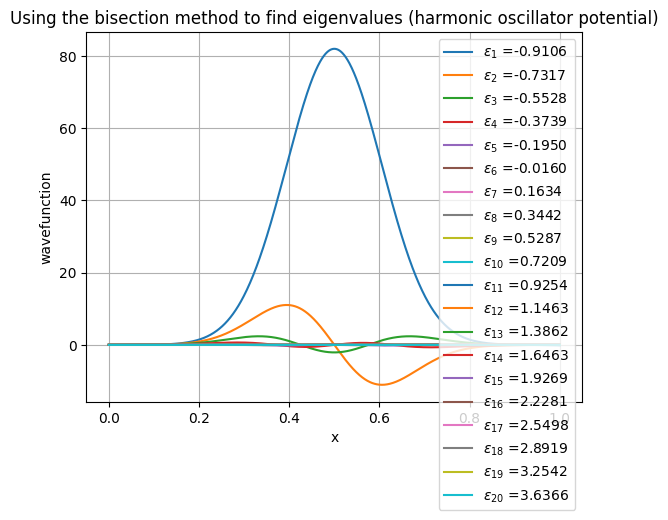

In [29]:
#Compute 20 
e = -0.99
eindex = 1
evalsh = []
while e < 3.5: # keep running until we have found ten eigenvalues
    de = 0.01
    e += de
    while abs(de) > 1e-8: #accuracy
        psi = harm_wave(e, x)    
        psi2 = harm_wave(e+de, x)
        if psi[N-1]*psi2[N-1] < 0: #if it changes sign then the product of the two values will be negative
            e = e + de
            de = -de/2
        else:
            e += de
    print(f"WOW WE FOUND AN EIGENVALUE!! - e{eindex} = {e:.8f}" )
    evalsh.append(e)
    plt.plot(x,psi,label=rf'$\epsilon_{{{eindex}}}$ ={e:.4f} ')
    eindex += 1
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("wavefunction")
plt.title("Using the bisection method to find eigenvalues (harmonic oscillator potential)")
plt.show
print(evalsh)


[0.1788854408264161, 0.17888559341430676, 0.17888727188110365, 0.17890134811401384, 0.17898777008056643, 0.17938711166381838, 0.18078798294067402, 0.18452630996704106, 0.19218395233154306, 0.204536247253418, 0.22093626022338908, 0.23989562988281254, 0.2600578117370611, 0.2806127166748049, 0.30119716644286676, 0.32168577194213244, 0.3420530128478929, 0.36230810165404526, 0.3824690628051681]


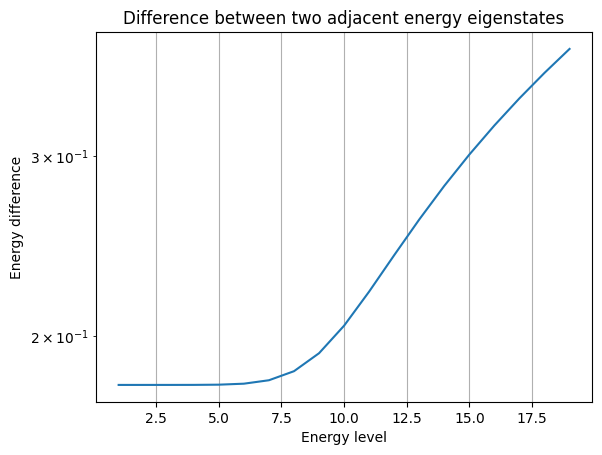

In [30]:
#Computing the difference between two adjacent energy eigenstates
diff = []
for i in range(1, len(evalsh)):
    diff.append(evalsh[i] - evalsh[i-1])
print(diff)

#Plotting the difference between two adjacent energy eigenstates on a log scale
plt.plot(range(1, len(evalsh)), diff)
plt.yscale('log')
plt.grid()
plt.xlabel("Energy level")
plt.ylabel("Energy difference")
plt.title("Difference between two adjacent energy eigenstates")
plt.show()